In [52]:
import pandas as pd
import os
import json
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
with open('/shared/2/projects/cross-lingual-exchange/data/top_langs_by_country.json','r') as f:
    langs_rt = json.load(f)
with open('/shared/2/projects/cross-lingual-exchange/data/top_langs_by_country_no_rt.json','r') as f:
    langs = json.load(f)

In [7]:
langs_rt

{'Germany': [['de', 0.5544136776652641],
  ['en', 0.25272700673987036],
  ['und', 0.08053471023582781],
  ['tr', 0.016921831903341716],
  ['fr', 0.013511729539265011]],
 'North Macedonia': [['sr', 0.4221863650184582],
  ['en', 0.1697517334263548],
  ['und', 0.13057862956254418],
  ['bg', 0.11216597615641037],
  ['ru', 0.0933821074211354],
  ['uk', 0.01258364003678576]],
 'Croatia': [['und', 0.5947122274891542],
  ['en', 0.29190633753532264],
  ['sl', 0.017854781929624464],
  ['fr', 0.012237537261732047],
  ['pl', 0.011594105815386297]],
 'Montenegro': [['und', 0.5567596650847868],
  ['en', 0.2620814315509476],
  ['sl', 0.024724480851192457],
  ['pl', 0.016532962548741044],
  ['sr', 0.01623794698183357],
  ['ko', 0.0130689477979627],
  ['it', 0.012896049330471844],
  ['tl', 0.012492216546262432],
  ['in', 0.0124692440226098]],
 'Belgium': [['en', 0.36384444758203205],
  ['nl', 0.2314330949790775],
  ['fr', 0.2144647314468731],
  ['und', 0.07209560356392268],
  ['de', 0.02852274490909004

In [8]:
langs

{'Germany': [['de', 0.6151828379051761],
  ['en', 0.19158284518412536],
  ['und', 0.09606687831200206],
  ['fr', 0.011944451035759201],
  ['tr', 0.011593450164209247]],
 'North Macedonia': [['sr', 0.42339296070596943],
  ['und', 0.14091848302834778],
  ['ru', 0.12953653269451026],
  ['en', 0.11577065319076388],
  ['bg', 0.10897295784991738],
  ['uk', 0.017731566078261655],
  ['sl', 0.012409983359125232]],
 'Croatia': [['und', 0.6702325918018401],
  ['en', 0.21453449976026126],
  ['sl', 0.021078914752526302],
  ['pl', 0.014151370129458914]],
 'Montenegro': [['und', 0.6521287973990462],
  ['en', 0.1547474000029769],
  ['sl', 0.0285760457931187],
  ['pl', 0.023519580513258868],
  ['tl', 0.01516301678329708],
  ['in', 0.0150630782348726],
  ['it', 0.013142982293866113],
  ['cs', 0.011499312125097546]],
 'Belgium': [['en', 0.2869869272467003],
  ['nl', 0.26395044801787837],
  ['fr', 0.2195887103882642],
  ['und', 0.09662830894084255],
  ['de', 0.041398591762352485],
  ['tr', 0.0157535664948

In [ ]:
# for each country
# Percentage in official country (from the ones I'm considering)
# change in EN tweets if we include retweets
# change in country lang tweets if we include retweets 


In [14]:
country_lang_file = '/shared/2/projects/cross-lingual-exchange/data/country_languages.tsv'
country_to_lang = pd.read_csv(country_lang_file,sep='\t').set_index('country').to_dict()['language']
country_codes_file = '/shared/2/projects/cross-lingual-exchange/data/european_country_codes.tsv'
name_to_code = pd.read_csv(country_codes_file,sep='\t').set_index('name').to_dict()['alpha-2']

In [41]:
def get_lang_dist(langs):
    lang_dist = []
    for country in langs:
        country_code = name_to_code[country]
        if country_code in country_to_lang:
            top_langs = langs[country]
            for x in top_langs:
                if x[0] == country_to_lang[country_code]:
                    majority_percent = x[1]
                if x[0] == 'en':
                    en_percent = x[1]
            lang_dist.append([country,country_to_lang[country_code],majority_percent,en_percent])

    df = pd.DataFrame(lang_dist,columns=['name','language','percent majority lang','percent English'])
    return df


In [42]:
df_no_rt = get_lang_dist(langs)
df_rt = get_lang_dist(langs_rt)

In [44]:
df_rt

,name,language,percent majority lang,percent English
0,Germany,de,0.554414,0.252727
1,Turkey,tr,0.798496,0.072588
2,Sweden,sv,0.528171,0.224366
3,Poland,pl,0.657788,0.193633
4,Austria,de,0.379916,0.329089
5,Hungary,hu,0.173571,0.448274
6,Czechia,cs,0.583458,0.229329
7,Estonia,et,0.278118,0.465806
8,United Kingdom,en,0.888037,0.888037
9,Greece,el,0.587308,0.275971


(0.0, 1.0)

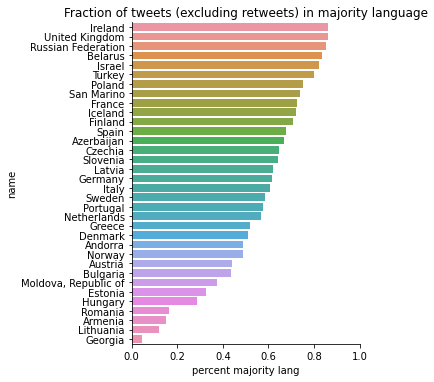

In [55]:
sns.catplot(y='name',x='percent majority lang',data=df_no_rt,kind='bar',
           order = df_no_rt.sort_values('percent majority lang',ascending=False)['name'])
plt.title('Fraction of tweets (excluding retweets) in majority language')
plt.xlim((0,1))

(0.0, 1.0)

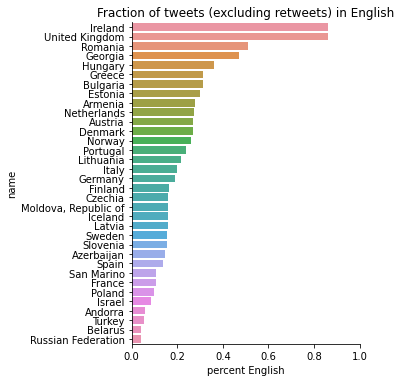

In [57]:
sns.catplot(y='name',x='percent English',data=df_no_rt,kind='bar',
           order = df_no_rt.sort_values('percent English',ascending=False)['name'])
plt.title('Fraction of tweets (excluding retweets) in English')
plt.xlim((0,1))

In [85]:
df = pd.merge(df_rt,df_no_rt,on=['name','language'],suffixes=(' with rt', ' no rt'))
df['majority lang difference'] = df['percent majority lang with rt'] - df['percent majority lang no rt']
df['English difference'] = df['percent English with rt'] - df['percent English no rt']
df = df[['name','majority lang difference','English difference']]
#df = pd.melt(df,id_vars='name')

Text(0.5, 1.0, 'Change in fraction of majority lang when including retweets')

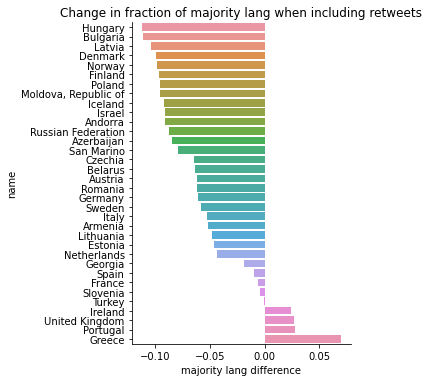

In [90]:
sns.catplot(y='name',x='majority lang difference',data=df,kind='bar',
            order = df.sort_values(['majority lang difference'])['name'])
plt.title('Change in fraction of majority lang when including retweets')


Text(0.5, 1.0, 'Change in fraction of English when including retweets')

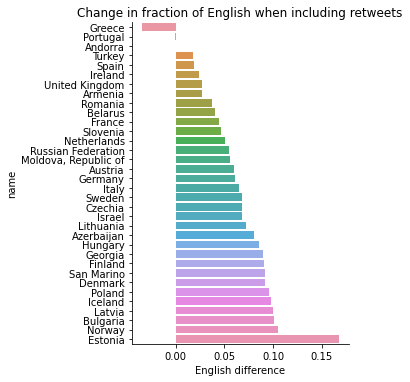

In [91]:
sns.catplot(y='name',x='English difference',data=df,kind='bar',
            order = df.sort_values(['English difference'])['name'])
plt.title('Change in fraction of English when including retweets')


In [103]:
und = []
for country in langs:
    for entry in langs[country]:
        if entry[0] == 'und':
            und.append([country,entry[1]])
df_und = pd.DataFrame(und,columns=['name','percent undetected'])

Text(0.5, 1.0, 'Fraction of tweets with undetected language (excl. retweets)')

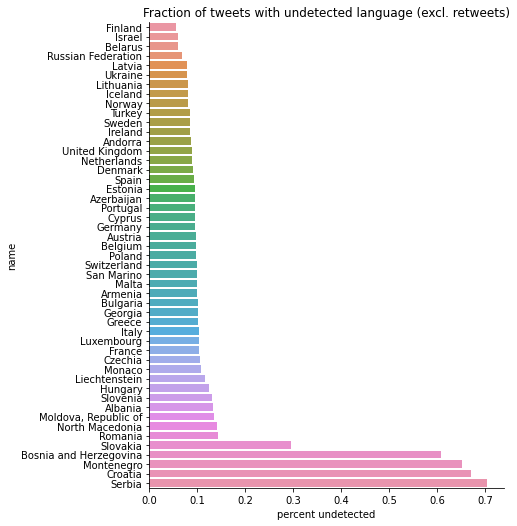

In [107]:
df_und
sns.catplot(y='name',x='percent undetected',data=df_und,kind='bar',
            order = df_und.sort_values(['percent undetected'])['name'],height=7)
plt.title('Fraction of tweets with undetected language (excl. retweets)')